<a href="https://colab.research.google.com/github/codewithswatiee/DS-AI-ML/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Removal using z-score (used for n-distribution)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/content/scholarship.csv')
df = data.copy()

In [3]:
df.shape

(1000, 3)

<ipython-input-4-a8422795c974>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])
<ipython-input-4-a8422795c974>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])


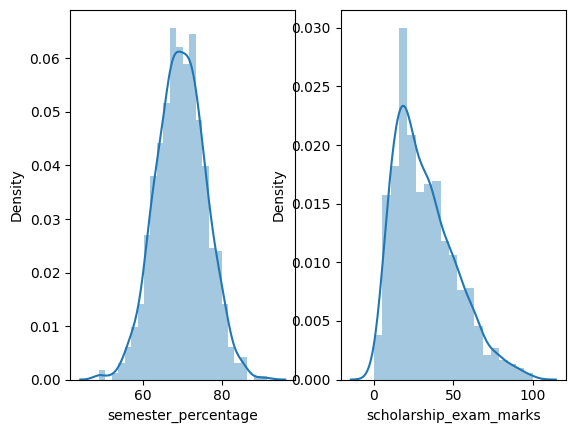

In [4]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage'])
plt.subplot(1, 2, 2)
sns.distplot(df['scholarship_exam_marks'])
plt.show()

In [5]:
mean = df['semester_percentage'].mean()
std = df['semester_percentage'].std()

print(mean, std)

69.6124 6.158978751323897


In [6]:
Highest_allowed = mean + 3* std
lowest_allowed = mean - 3* std

print(Highest_allowed, lowest_allowed)

88.08933625397168 51.13546374602831


In [7]:
df[(df['semester_percentage'] < lowest_allowed) | (df['semester_percentage'] > Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


Triming

In [8]:
df[(df['semester_percentage'] > lowest_allowed) & (df['semester_percentage'] < Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [9]:
df['z_score'] = (df['semester_percentage'] - df['semester_percentage'].mean()) / df['semester_percentage'].std()

In [10]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [11]:
df[(df['z_score'] <-3) | (df['z_score'] > 3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [12]:
df[(df['z_score'] > -3) & (df['z_score'] < 3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


Capping

In [13]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std

In [14]:
df['semester_percentage'] = np.where(df['semester_percentage'] > upper_limit, upper_limit, np.where(df['semester_percentage'] < lower_limit, lower_limit, df['semester_percentage']))

In [16]:
df[(df['semester_percentage'] < lowest_allowed) & (df['semester_percentage'] > Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


## Removal using IQR

<ipython-input-17-35301557bb4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

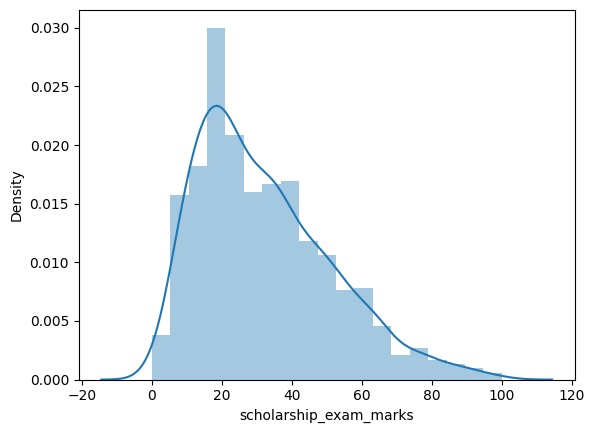

In [17]:
sns.distplot(df['scholarship_exam_marks'])

<Axes: ylabel='scholarship_exam_marks'>

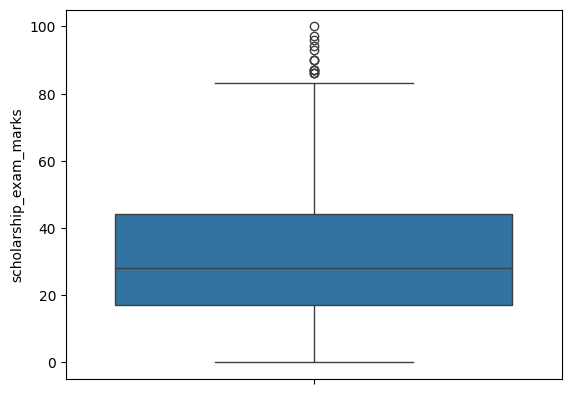

In [18]:
sns.boxplot(df['scholarship_exam_marks'])

In [20]:
Q1 = df['scholarship_exam_marks'].quantile(0.25)
Q3 = df['scholarship_exam_marks'].quantile(0.75)
Q1, Q3

(np.float64(17.0), np.float64(44.0))

In [21]:
IQR = Q3 - Q1

In [24]:
min = Q1 - 1.5* IQR
max = Q3 + 1.5* IQR
min, max

(np.float64(-23.5), np.float64(84.5))

In [32]:
df[(df['scholarship_exam_marks'] > max) |  (df['scholarship_exam_marks'] < min)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
9,77.5,94,1,1.280667
40,66.0,86,1,-0.586526
61,75.1,86,0,0.890992
134,63.3,93,0,-1.024910
162,78.0,90,0,1.361849
283,70.9,87,0,0.209061
290,83.8,87,0,2.303564
311,69.7,87,1,0.014223
324,66.4,90,0,-0.521580
630,65.6,96,1,-0.651472


Triming

In [35]:
new_data = df[(df['scholarship_exam_marks'] < max) &  (df['scholarship_exam_marks'] > min)]

<ipython-input-36-2e96cb87935d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
<ipython-input-36-2e96cb87935d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['scholarship_exam_marks'])


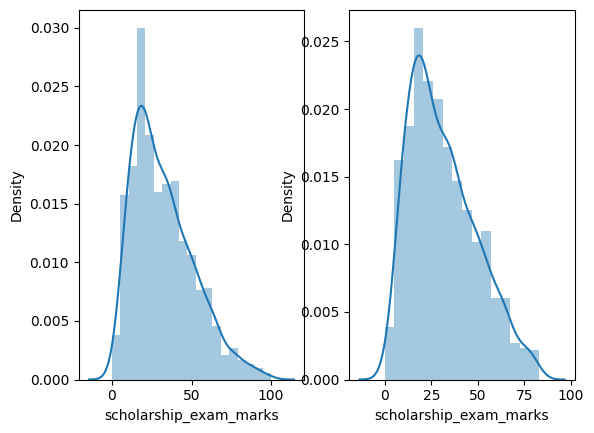

In [36]:
plt.subplot(1, 2, 1)
sns.distplot(df['scholarship_exam_marks'])
plt.subplot(1, 2, 2)
sns.distplot(new_data['scholarship_exam_marks'])
plt.show()

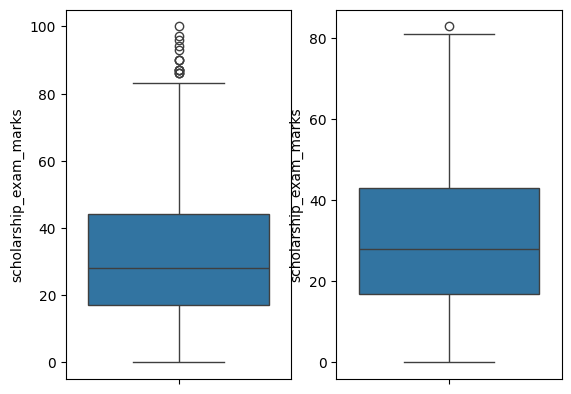

In [37]:
plt.subplot(1, 2, 1)
sns.boxplot(df['scholarship_exam_marks'])
plt.subplot(1, 2, 2)
sns.boxplot(new_data['scholarship_exam_marks'])
plt.show()

Capping

In [39]:
df['scholarship_exam_marks'] = np.where(df['scholarship_exam_marks'] > max, max, np.where(df['scholarship_exam_marks'] < min, min, df['scholarship_exam_marks']))

<Axes: ylabel='scholarship_exam_marks'>

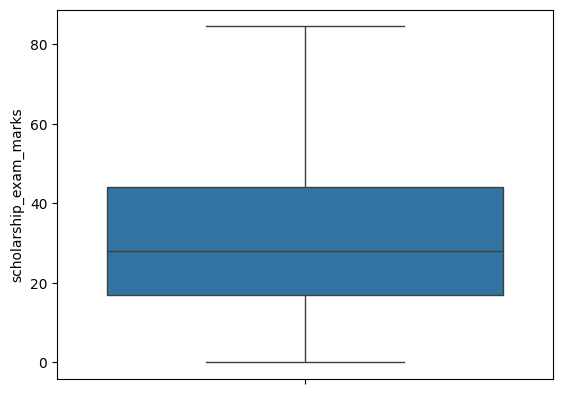

In [40]:
sns.boxplot(df['scholarship_exam_marks'])

## Removal using Percentile

<Axes: ylabel='semester_percentage'>

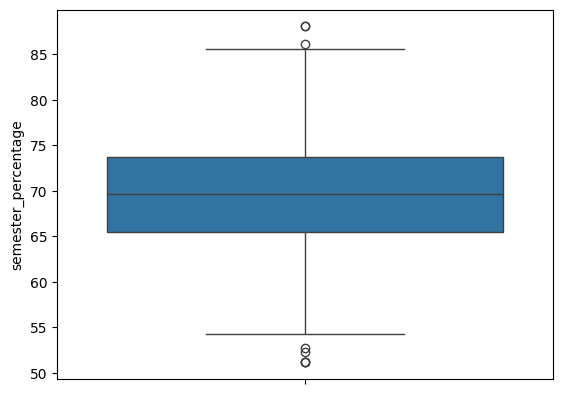

In [41]:
sns.boxplot(df['semester_percentage'])

In [42]:
min_limit = df['semester_percentage'].quantile(0.01)
max_limit = df['semester_percentage'].quantile(0.99)

In [43]:
min_limit, max_limit

(np.float64(55.596000000000004), np.float64(84.20100000000001))

In [47]:
df[(df['semester_percentage'] > max_limit) | (df['semester_percentage'] < min_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
37,85.100000,9.0,1,2.514638
150,85.300000,22.0,0,2.547111
216,54.200000,36.0,1,-2.502428
219,54.800000,3.0,0,-2.405009
278,52.300000,17.0,1,-2.810921
279,84.900000,40.0,1,2.482165
440,85.600000,22.0,0,2.595820
471,54.800000,18.0,0,-2.405009
485,51.135464,44.0,1,-3.314251
492,85.000000,21.0,1,2.498401


Capping

In [48]:
df['semester_percentage'] = np.where(df['semester_percentage'] > max_limit, max_limit, np.where(df['semester_percentage'] < min_limit, min_limit, df['semester_percentage']))

<Axes: ylabel='semester_percentage'>

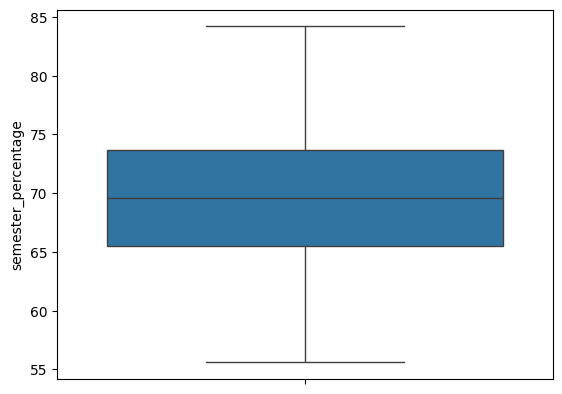

In [49]:
sns.boxplot(df['semester_percentage'])